In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('shopeep_koreantop_clothing_shop_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    object 
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

In [2]:
#kiểm định tương quan giữa rating_star và follower
df1 = df.filter(['rating_star', 'follower_count'])
df1 = df1.dropna()
df1

,rating_star,follower_count
0,4.81,17487
1,4.68,8574
2,4.91,660417
3,4.94,18787
4,4.73,67371
...,...,...
741,5.00,115
742,4.60,84
743,4.75,5982
744,4.78,44029


,rating_star,follower_count
0,4.81,17487
1,4.68,8574
3,4.94,18787
4,4.73,67371
5,5.00,41
...,...,...
740,4.84,513469
741,5.00,115
742,4.60,84
743,4.75,5982


PearsonRResult(statistic=0.08726280694255223, pvalue=0.021785251323968125)

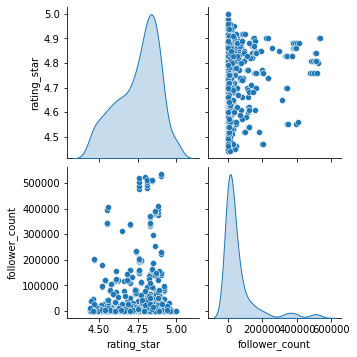

In [3]:
import scipy.stats as stats
threshold = 0.5
z = np.abs(stats.zscore(df1))
df1 = df1[(z < 2).all(axis=1)]
display(df1)
sns.pairplot(df1, diag_kind = 'kde')
stats.pearsonr(x=df1['rating_star'], y=df1['follower_count'])